In [1]:
import os, shutil

original_dataset_dir = '../datasets/cats_and_dogs/train'

base_dir = '../datasets/cats_and_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dirs = [train_dir, validation_dir, test_dir, 
         train_cats_dir, train_dogs_dir, 
         validation_cats_dir, validation_dogs_dir, 
         test_cats_dir, test_dogs_dir]

for directory in dirs:
    os.mkdir(directory)

In [2]:
def copy_pics(filename, dirname, start_pic, end_pic):
    fnames = [f'{filename}.{i}.jpg' for i in range(start_pic, end_pic)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(dirname, fname)
        shutil.copyfile(src, dst)

copy_pics('cat', train_cats_dir, 0, 1000)
copy_pics('cat', validation_cats_dir, 1000, 1500)
copy_pics('cat', test_cats_dir, 1500, 2000)
copy_pics('dog', train_dogs_dir, 0, 1000)
copy_pics('dog', validation_dogs_dir, 1000, 1500)
copy_pics('dog', test_dogs_dir, 1500, 2000)

In [3]:
len(os.listdir(train_cats_dir))

1000

In [4]:
len(os.listdir(train_dogs_dir))

1000

In [5]:
len(os.listdir(validation_cats_dir))

500

In [6]:
len(os.listdir(validation_dogs_dir))

500

In [7]:
len(os.listdir(test_cats_dir))

500

In [8]:
len(os.listdir(test_dogs_dir))

500

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [14]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 28s 280ms/step - loss: 0.6892 - acc: 0.5270 - val_loss: 0.6621 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 22s 224ms/step - loss: 0.6457 - acc: 0.6260 - val_loss: 0.6289 - val_acc: 0.6360
Epoch 3/30
100/100 [==============================] - 23s 226ms/step - loss: 0.5953 - acc: 0.6835 - val_loss: 0.6009 - val_acc: 0.6810
Epoch 4/30
100/100 [==============================] - 23s 226ms/step - loss: 0.5576 - acc: 0.7125 - val_loss: 0.5929 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 23s 226ms/step - loss: 0.5342 - acc: 0.7280 - val_loss: 0.6134 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 23s 226ms/step - loss: 0.5134 - acc: 0.7355 - val_loss: 0.5679 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 23s 227ms/step - loss: 0.4798 - acc: 0.7715 - val_loss: 0.5621 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 2

In [15]:
model.save('cats_and_dogs_small_1.h5')

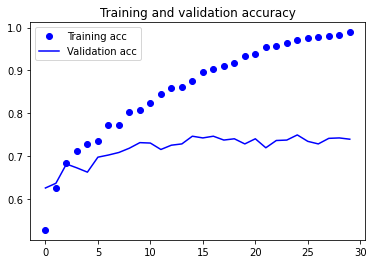

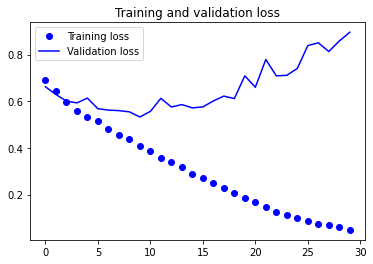

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

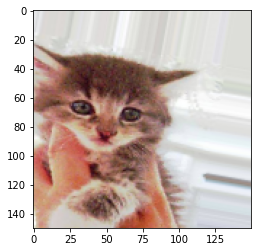

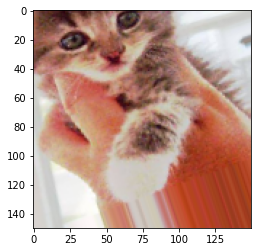

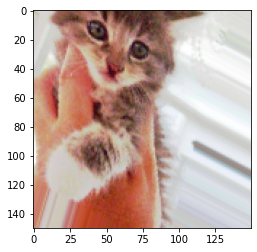

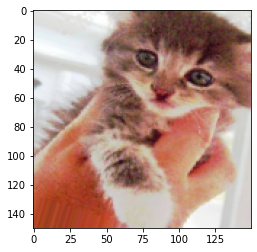

In [18]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 24s 231ms/step - loss: 0.6951 - acc: 0.4930 - val_loss: 0.6912 - val_acc: 0.5130
Epoch 2/100
100/100 [==============================] - 23s 229ms/step - loss: 0.6877 - acc: 0.5285 - val_loss: 0.6845 - val_acc: 0.5110
Epoch 3/100
100/100 [==============================] - 23s 230ms/step - loss: 0.6797 - acc: 0.5635 - val_loss: 0.6643 - val_acc: 0.5800
Epoch 4/100
100/100 [==============================] - 25s 249ms/step - loss: 0.6651 - acc: 0.5930 - val_loss: 0.6667 - val_acc: 0.5600
Epoch 5/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6578 - acc: 0.6090 - val_loss: 0.6674 - val_acc: 0.6040
Epoch 6/100
100/100 [==============================] - 24s 241ms/step - loss: 0.6515 - acc: 0.6070 - val_loss: 0.6335 - val_acc: 0.6130
Epoch 7/100
100/100 [==============================] - 24s 240ms/step - loss: 0.6400 - acc: 0.6205 - val_loss: 0.6054 - val_acc: 0.6660
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 24s 235ms/step - loss: 0.4513 - acc: 0.7970 - val_loss: 0.4265 - val_acc: 0.8130
Epoch 62/100
100/100 [==============================] - 24s 236ms/step - loss: 0.4549 - acc: 0.7915 - val_loss: 0.4316 - val_acc: 0.8060
Epoch 63/100
100/100 [==============================] - 24s 236ms/step - loss: 0.4400 - acc: 0.7880 - val_loss: 0.4548 - val_acc: 0.7970
Epoch 64/100
100/100 [==============================] - 25s 247ms/step - loss: 0.4394 - acc: 0.7950 - val_loss: 0.4606 - val_acc: 0.7940
Epoch 65/100
100/100 [==============================] - 24s 241ms/step - loss: 0.4374 - acc: 0.7930 - val_loss: 0.5307 - val_acc: 0.7640
Epoch 66/100
100/100 [==============================] - 24s 240ms/step - loss: 0.4469 - acc: 0.7910 - val_loss: 0.4596 - val_acc: 0.7850
Epoch 67/100
100/100 [==============================] - 24s 239ms/step - loss: 0.4315 - acc: 0.8070 - val_loss: 0.5145 - val_acc: 0.7730
Epoch 68/100
100/100 [===================

In [22]:
model.save('cats_and_dogs_small_2.h5')

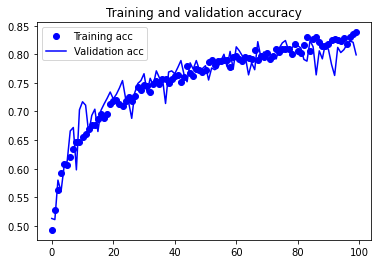

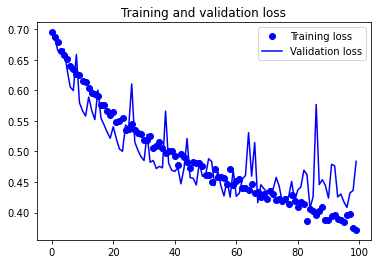

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()